<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [6]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-09-08 21:58:25--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv.4’

survey-data.csv.4   100%[===================>] 152.13M  60.0MB/s    in 2.5s    

2025-09-08 21:58:29 (60.0 MB/s) - ‘survey-data.csv.4’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [2]:
!pip install pandas 
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 158.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 174.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 152.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 161.4 MB/s eta 0:00:00


**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [9]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [12]:
import sqlite3

# Create a connection to the SQLite database 
conn = sqlite3.connect('survey-data.sqlite') 
# Write the dataframe to the SQLite database 
df.to_sql('main', conn, if_exists='replace', index=False) 
# Close the connection
conn.close()

**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [13]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [14]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [15]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [18]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [17]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


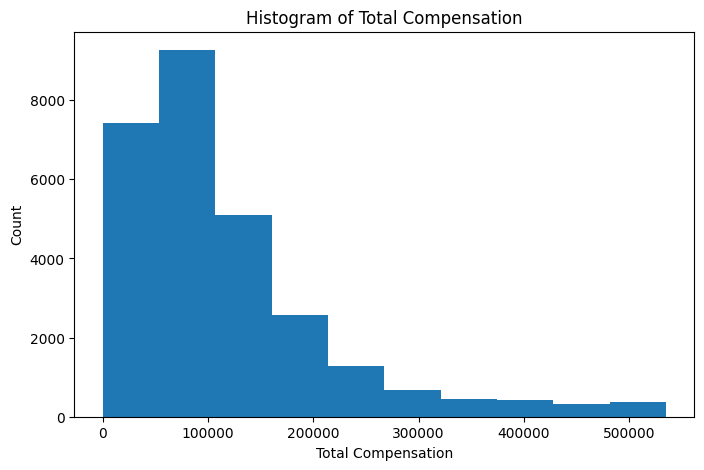

In [25]:
## Write your code here

# Load CompTotal column into a DataFrame
df = pd.read_sql_query("SELECT CompTotal FROM main", conn)

df = df.dropna(subset=['CompTotal'])

# Calculate Q1 and Q3
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe
df_no_outliers = df[(df['CompTotal'] >= lower_bound) & (df['CompTotal'] <= upper_bound)]

df_no_outliers['CompTotal'].plot(kind='hist', figsize=(8, 5))
# add a title to the histogram
plt.title('Histogram of Total Compensation')
# add y-label
plt.ylabel('Count')
# add x-label
plt.xlabel('Total Compensation')

plt.show()

**Box Plots**

Plot a box plot of Age.


['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


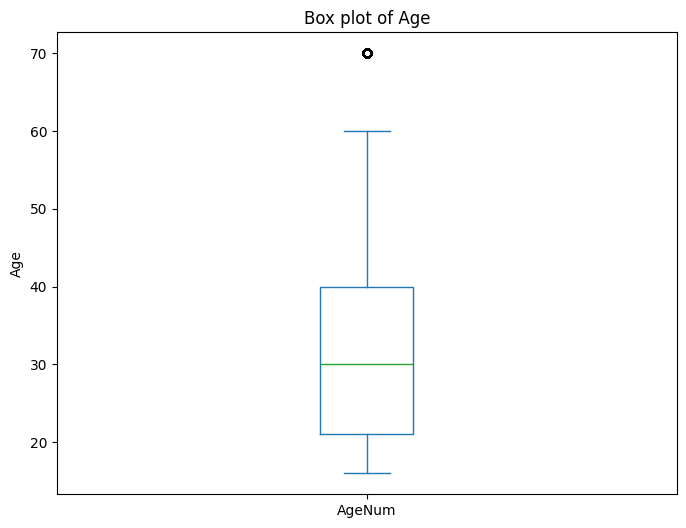

count    65115.000000
mean        33.373969
std         11.392118
min         16.000000
25%         21.000000
50%         30.000000
75%         40.000000
max         70.000000
Name: AgeNum, dtype: float64


In [27]:
## Write your code here


df = pd.read_sql_query("SELECT Age FROM main", conn)
df = df.dropna(subset=['Age'])

print(df['Age'].unique())
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': np.nan  
}

# Apply mapping
df['AgeNum'] = df['Age'].map(age_mapping)

#Visualize using box plot
df['AgeNum'].plot(kind='box', figsize=(8, 6))
plt.title('Box plot of Age')
plt.ylabel('Age')
plt.show()

print(df['AgeNum'].describe())

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


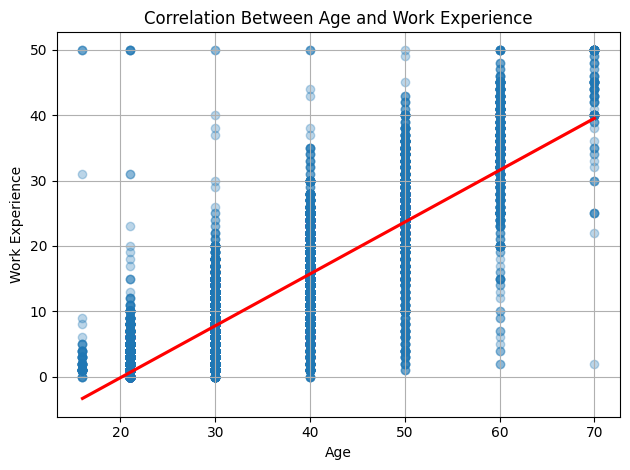

In [28]:
## Write your code here

# Query all data from the table
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Mapping Age
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': np.nan  
}

# Apply mapping
df['AgeNum'] = df['Age'].map(age_mapping)


# Drop rows with missing values in both the columns
df_clean = df.dropna(subset=['AgeNum', 'WorkExp'])

# Scatter Plot to show Correlation
sns.regplot(x="AgeNum", y="WorkExp", data=df_clean, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Age")
plt.ylabel("Work Experience")
plt.title("Correlation Between Age and Work Experience")
plt.grid(True)
plt.tight_layout()
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


['30-60 minutes a day' '60-120 minutes a day' '15-30 minutes a day'
 'Less than 15 minutes a day' 'Over 120 minutes a day']


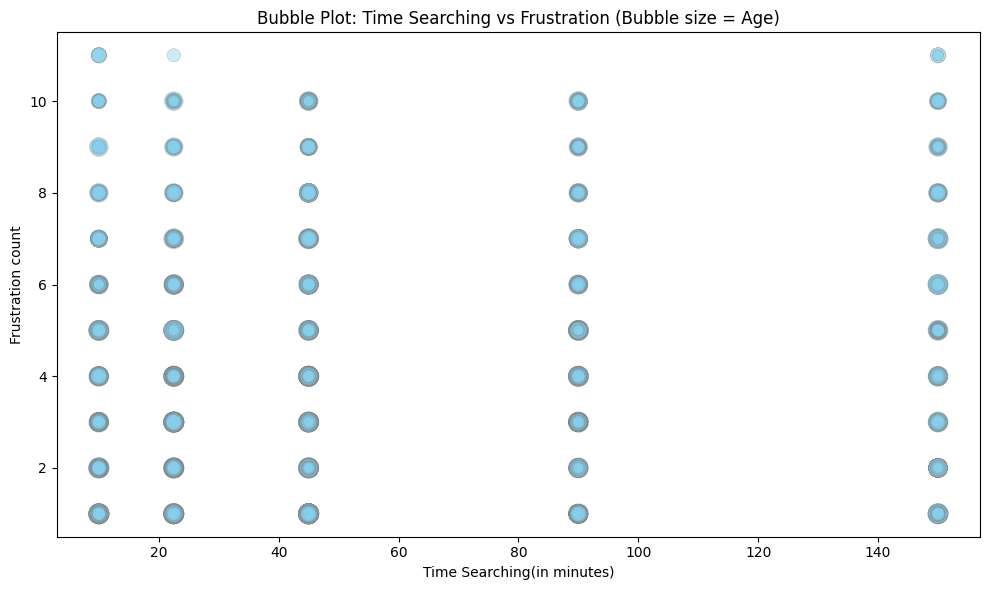

In [29]:
## Write your code here


# Drop missing values in relevant columns
df_clean = df.dropna(subset=['AgeNum', 'TimeSearching', 'Frustration']).copy()

print(df_clean['TimeSearching'].unique())

# Mapping TimeSearching column
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
df_clean['TimeSearchingNum'] = df_clean['TimeSearching'].map(time_mapping)

# Count number of frustrations
df_clean['FrustrationNum'] = df_clean['Frustration'].apply(lambda x: len(str(x).split(';')))


plt.figure(figsize=(10, 6))
plt.scatter(
    x=df_clean['TimeSearchingNum'],
    y=df_clean['FrustrationNum'],
    s=df_clean['AgeNum']*3,        # Bubble size
    alpha=0.4,
    c='skyblue',
    edgecolors='gray',
    linewidth=0.5
)

plt.xlabel('Time Searching(in minutes)')
plt.ylabel('Frustration count')
plt.title('Bubble Plot: Time Searching vs Frustration (Bubble size = Age)')
plt.tight_layout()
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


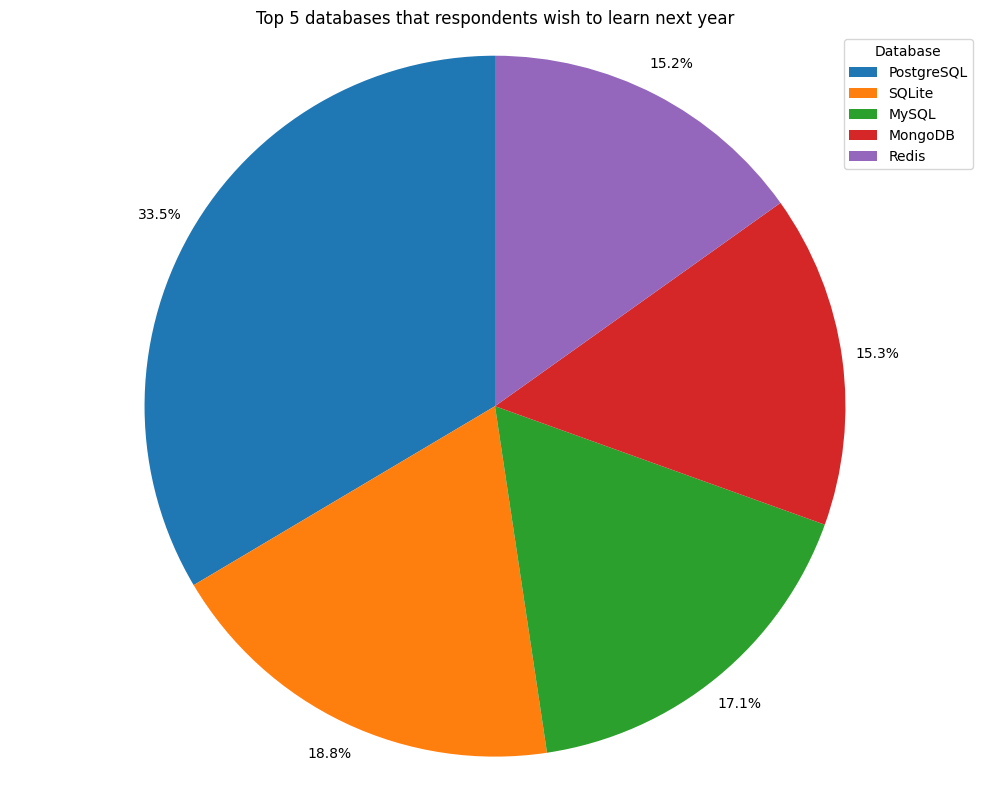

In [30]:
## Write your code here
#Pie Chart
db_clean = df['DatabaseWantToWorkWith'].dropna().str.split(';').explode().str.strip()
db_counts = db_clean.value_counts()
top_5_dbs = db_counts.head(5)
top_5_dbs.plot(kind='pie',
                    figsize=(10, 8),
                    autopct='%1.1f%%',    # show percentages
                    startangle=90,        # start at top
                    labels=None,          # no labels on slices
                    pctdistance=1.1,      # place pct outside slices
                    ylabel='')            # remove ylabel

plt.title('Top 5 databases that respondents wish to learn next year')
plt.axis('equal')  # Make the pie circular

plt.legend( title='Database',labels=top_5_dbs.index,loc='upper right',bbox_to_anchor=(1, 1))
plt.tight_layout()  # adjusts layout to fit legend
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


/tmp/ipykernel_300/14820100.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TimeSearchingNum'] = df_clean['TimeSearching'].map(time_mapping)
/tmp/ipykernel_300/14820100.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TimeAnsweringNum'] = df_clean['TimeAnswering'].map(time_mapping)


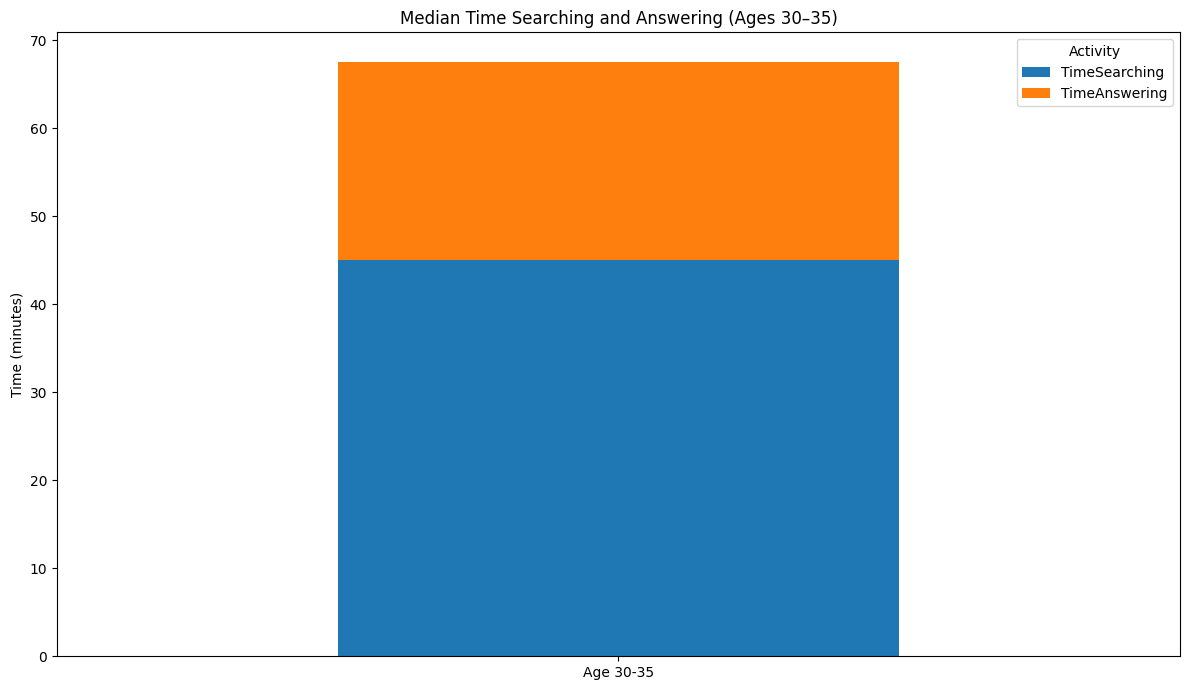

In [31]:
## Write your code here

# Drop missing values
df_clean = df.dropna(subset=['TimeSearching', 'TimeAnswering','Age'])

# Mapping TimeSearching and TimeAnswering column
time_mapping = {
    'Less than 15 minutes a day': 10,
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 150
}
df_clean['TimeSearchingNum'] = df_clean['TimeSearching'].map(time_mapping)
df_clean['TimeAnsweringNum'] = df_clean['TimeAnswering'].map(time_mapping)

# Filter age groups (30 to 35)
age_groups = ['25-34 years old', '35-44 years old']
filtered_df = df_clean[df_clean['Age'].isin(age_groups)]


timeSearching_median = filtered_df['TimeSearchingNum'].median()
timeAnswering_median = filtered_df['TimeAnsweringNum'].median()

# Combine into a single DataFrame
combined_df = pd.DataFrame({
    'TimeSearching': timeSearching_median,
    'TimeAnswering': timeAnswering_median
},  index=['Age 30-35'])
# Plot as stacked bar chart
combined_df.plot(kind='bar', stacked=True, figsize=(12, 7))

plt.title('Median Time Searching and Answering (Ages 30–35)')
plt.ylabel('Time (minutes)')
plt.xticks(rotation=0)
plt.legend(title='Activity')
plt.tight_layout()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


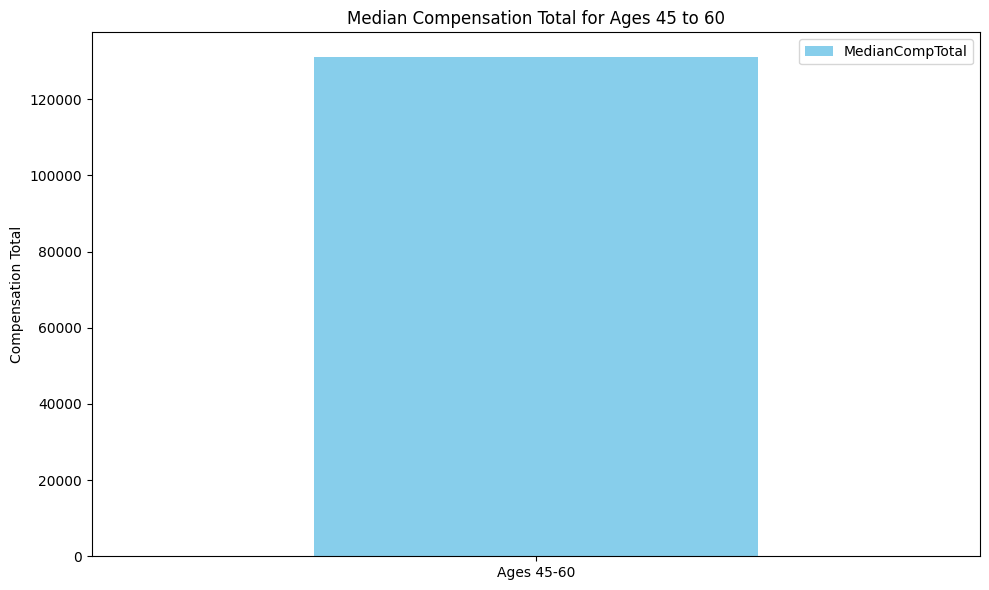

In [32]:
## Write your code here

# Drop missing values
df_clean = df.dropna(subset=['CompTotal', 'Age'])

# Filter Age Groups 45-60
age_groups = ['45-54 years old', '55-64 years old']
filtered_df = df_clean[df_clean['Age'].isin(age_groups)]

# Compute median CompTotal
median_comp = filtered_df['CompTotal'].median()

# Create a DataFrame with one row for plotting
combined_df = pd.DataFrame({
    'MedianCompTotal': [median_comp]
}, index=['Ages 45-60'])
# Plot the bar chart
combined_df.plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Median Compensation Total for Ages 45 to 60')
plt.ylabel('Compensation Total')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


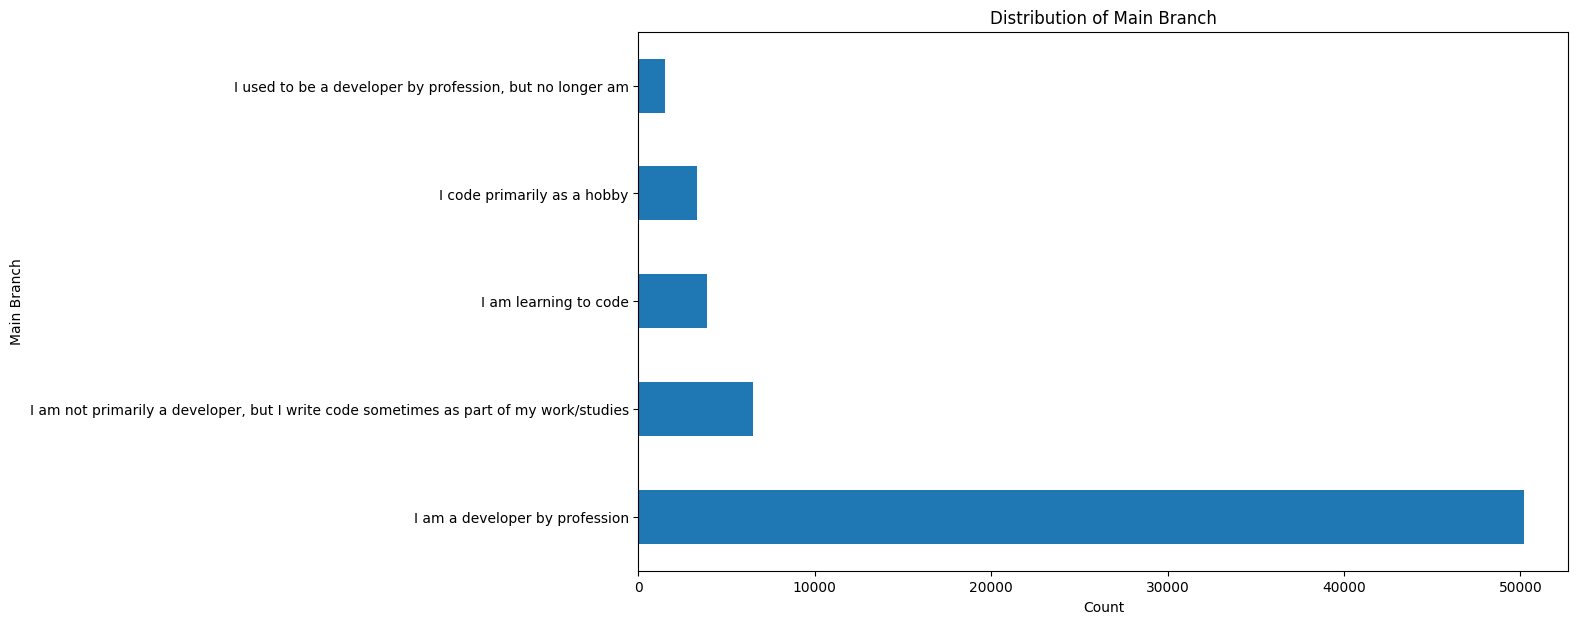

In [13]:
## Write your code here

mainBranch_counts= df['MainBranch'].value_counts()
mainBranch_counts.plot(kind='barh', figsize=(12, 7))
plt.title('Distribution of Main Branch')
plt.ylabel('Main Branch')
plt.xlabel('Count')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [14]:
conn.close()

NameError: name 'conn' is not defined

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
